<a href="https://colab.research.google.com/github/chirag2saraiya/Session-11/blob/master/Assignment-11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
print (num_classes)
print (num_train)
print (train_features.shape)

10
50000
(50000, 32, 32, 3)


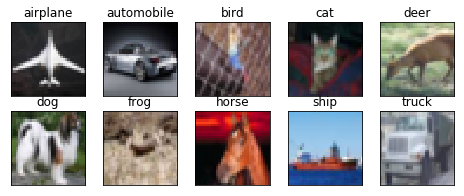

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

##Learning Rate Finder

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding=

Epoch 1/8
50000/50000 [==============================] - 18s 356us/step - loss: 1.8604 - acc: 0.3456
Epoch 2/8
50000/50000 [==============================] - 10s 210us/step - loss: 1.4126 - acc: 0.5042
Epoch 3/8
50000/50000 [==============================] - 11s 211us/step - loss: 1.1449 - acc: 0.6064
Epoch 4/8
50000/50000 [==============================] - 11s 210us/step - loss: 1.0033 - acc: 0.6636
Epoch 5/8
50000/50000 [==============================] - 10s 208us/step - loss: 0.9555 - acc: 0.6924
Epoch 6/8
50000/50000 [==============================] - 10s 207us/step - loss: 1.1078 - acc: 0.6870
Epoch 7/8
47104/50000 [===========================>..] - ETA: 0s - loss: 1.6040 - acc: 0.6218<DeepLearning.lr_finder.LRFinder object at 0x7f48a1cf0860>


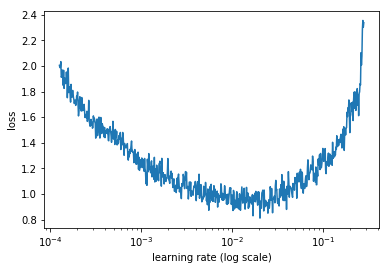

In [0]:
from keras import optimizers
from DeepLearning import lr_finder

# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Convolution2D(10, 1, 1))

model1.add(AveragePooling2D(pool_size = (4,4)))
model1.add(Flatten())


model1.add(Activation('softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model is a Keras model
lr1 = lr_finder.LRFinder(model1)

# Train a model with batch size 512 for 5 epochs
# with learning rate growing exponentially from 0.0001 to 1
lr1.find(train_features, train_labels, start_lr=0.0001, end_lr=1, batch_size=512, epochs=8)

print(lr1)
# Plot the loss, ignore 20 batches in the beginning and 5 in the end
lr1.plot_loss(n_skip_beginning=20, n_skip_end=5)





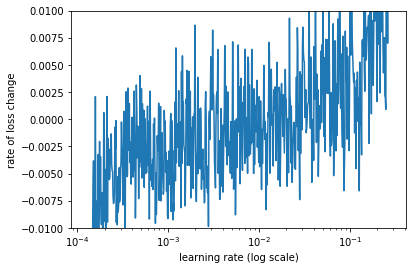

In [0]:
# Plot rate of change of the loss
# Ignore 20 batches in the beginning and 5 in the end
# Smooth the curve using simple moving average of 20 batches
# Limit the range for y axis to (-0.02, 0.01)
lr1.plot_loss_change(sma=20, n_skip_beginning=20, n_skip_end=5, y_lim=(-0.01, 0.01))

###From the  first graph we can see good learning rate will be somewhere near 0.02.
###Since after that loss value is increasing.

### Total params: 455,370

###SGD with Momentum

In [0]:
sgd = optimizers.SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model with SGD with momentum 
model1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

#Cutout Implementation

In [0]:

!git clone https://github.com/chirag2saraiya/DeepLearning

Cloning into 'DeepLearning'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 23 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 29s 76ms/step - loss: 1.6456 - acc: 0.4235 - val_loss: 2.3511 - val_acc: 0.1249

Epoch 00001: val_acc improved from -inf to 0.12490, saving model to /content/gdrive/My Drive/assignment_11_model.best.hdf5
Epoch 2/100
390/390 [==============================] - 24s 61ms/step - loss: 1.2548 - acc: 0.5696 - val_loss: 2.2350 - val_acc: 0.4125

Epoch 00002: val_acc improved from 0.12490 to 0.41250, saving model to /content/gdrive/My Drive/assignment_11_model.best.hdf5
Epoch 3/100
390/390 [==============================] - 24s 61ms/step - loss: 1.1208 - acc: 0.6179 - val_loss: 1.3936 - val_acc: 0.5981

Epoch 00003: val_acc improved from 0.41250 to 0.59810, saving model to /content/gdrive/My Drive/assignment_11_model.best.hdf5
Epoch 4/100
390/390 [==============================] - 24s 61ms/step - loss: 1.0299 - acc: 0.6546 - val_loss: 1.0883 - val_acc: 0.6558

Epoch 00004: val_acc improved from 0.59810 to 0.65580, saving model to /content/g

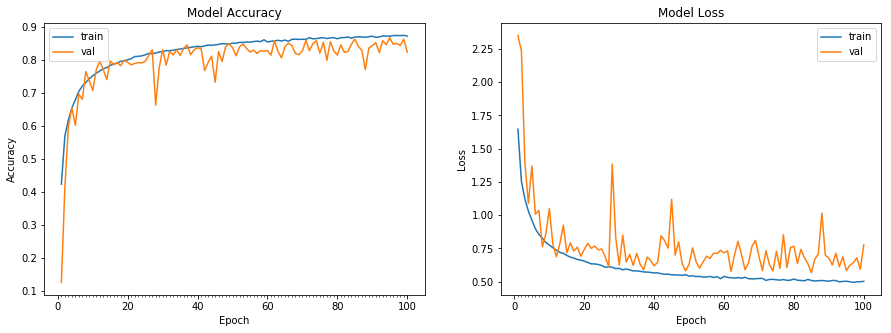

Accuracy on test data is: 8.53


In [0]:
from keras.preprocessing.image import ImageDataGenerator



from DeepLearning import random_eraser

from keras.callbacks import ModelCheckpoint

#Mounting google drive in colab to save model and misclassified image
from google.colab import drive
drive.mount('/content/gdrive')

#We will save our trained best model on disk .. We will store the model in the HDF5 file format

filepath=F"/content/gdrive/My Drive/assignment_11_model.best.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

#Adding Image augmentation
datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='constant',
        cval=0,
         preprocessing_function=random_eraser.get_random_eraser(v_l=0, v_h=1))


# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpoint])

# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))

###Find Misclassified images

In [8]:
!git clone https://github.com/chirag2saraiya/DeepLearning


Cloning into 'DeepLearning'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 32 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [0]:
from keras.models import load_model
from keras.preprocessing.image import save_img
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#from DeepLearning import find_missclassified
from keras.preprocessing.image import ImageDataGenerator


def find_misclassified_images (model_path, test_features, test_labels): 
#Load the best saved model and create predictions on the test set

  model = load_model(model_path)
  # create generator to standardize images
  datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

  # prepare an iterators to scale images
  test_iterator = datagen.flow(test_features, test_labels, batch_size=128,shuffle=False)

  probabilities = model.predict_generator(test_iterator,steps=len(test_iterator))

  print(probabilities[0])
  predicted_class = np.argmax(probabilities, axis=1)
  true_class = np.argmax(test_labels, axis=1)

  incorrect_indices = np.nonzero(y_pred != true_class)[0]   
  correct_indices = np.nonzero(predicted_class == true_class)[0] 
  print(len(correct_indices)," classified correctly") 
  print(len(incorrect_indices)," classified incorrectly")

  return incorrect_indices,predicted_class,true_class

def print_save_misclassified_images(incorrect_indices,number,x_test,y_pred,y_test,save_path,save_flag=0):
  
  for i, incorrect in enumerate(incorrect_indices[:number]):
    
    if save_flag == 1 :
      filepath2="{}{}.{}".format(save_path,i,".jpg")
      #print(filepath2)
      save_img(filepath2, X_test[incorrect])
      
    img = test_features[incorrect]
    plt.imshow(img)

    plt.title( "Predicted {}, Truth: {}".format(class_names[y_pred[incorrect]], class_names[test_labels[incorrect]]))

    plt.xticks([])

    plt.yticks([])

    plt.show()

In [36]:

incorrect_indices,predicted_class,true_class = find_misclassified_images(filepath,test_features,test_labels)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


[1.2142318e-06 1.0772824e-06 2.3121118e-04 9.9846387e-01 3.0272534e-07
 1.0680213e-03 2.3045609e-04 9.4359516e-09 3.7127261e-06 9.9100006e-08]
8680  classified correctly
1320  classified incorrectly


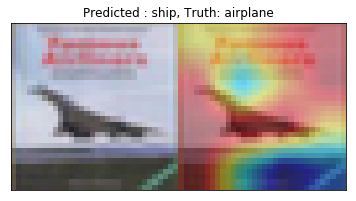

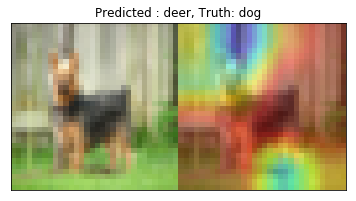

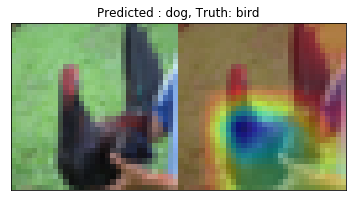

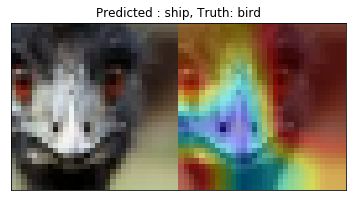

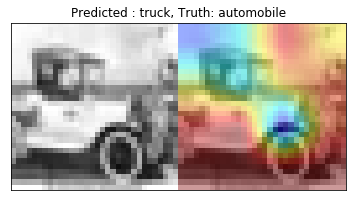

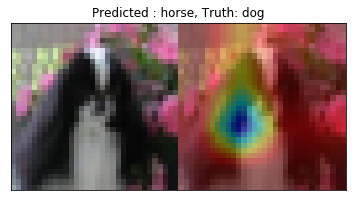

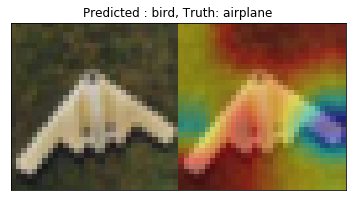

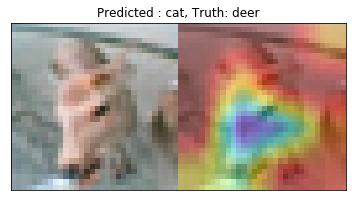

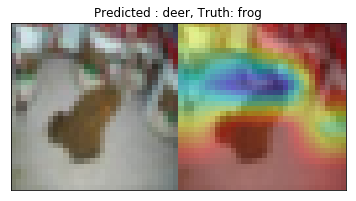

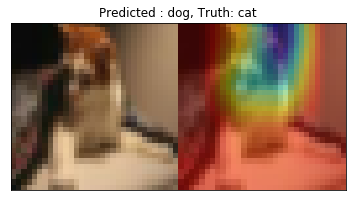

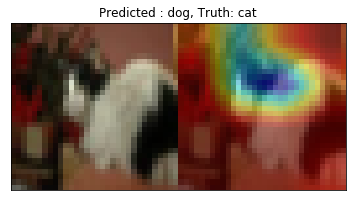

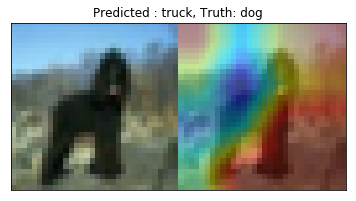

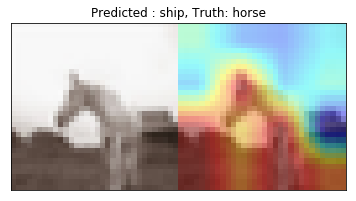

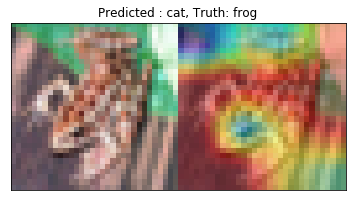

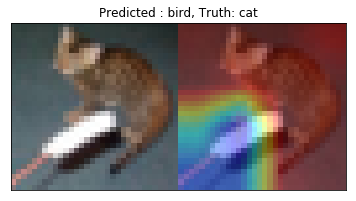

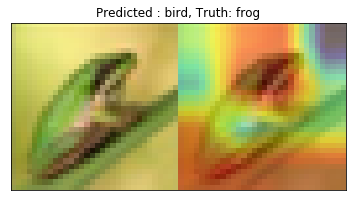

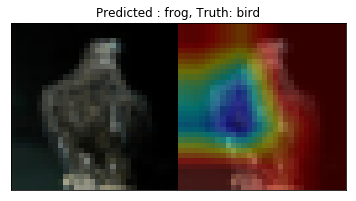

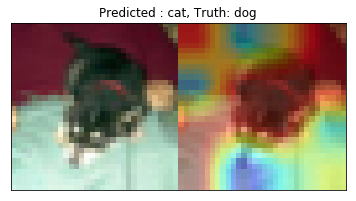

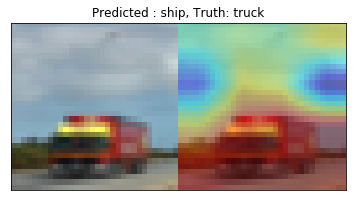

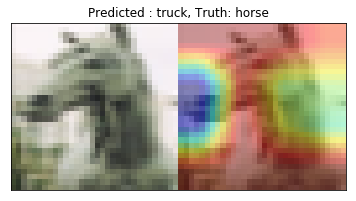

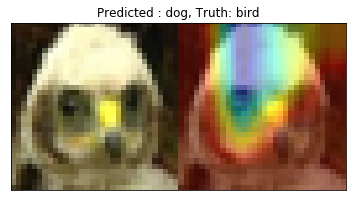

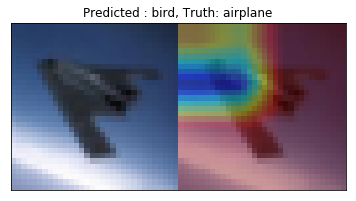

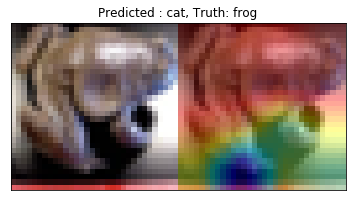

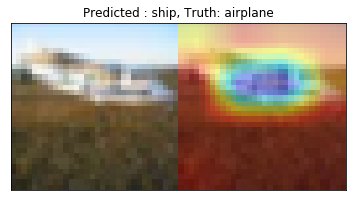

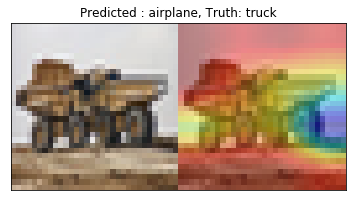

In [40]:
#print_save_misclassified_images(incorrect_indices,5,test_features,predicted_class,true_class,"",0)
from keras.models import load_model
from keras.preprocessing.image import save_img
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import save_img
import cv2

for j, incorrect in enumerate(incorrect_indices[:25]):

  #print(incorrect)
  
  x = image.img_to_array(test_features[incorrect])
  x = np.expand_dims(x, axis=0)
  
  cfar_model = load_model(filepath)

  preds = cfar_model.predict(x)


  class_idx = np.argmax(preds[0])
  class_output = cfar_model.output[:, class_idx]
  last_conv_layer = cfar_model.get_layer("conv2d_263")

  img = test_features[incorrect]
  img = img.copy()
  x = [img]

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([cfar_model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)


  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  img = np.uint8(255 * img)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  
  concat = np.concatenate((img, superimposed_img), axis=1)
  plt.imshow(concat)
  
  #print (class_names[predicted_class[incorrect]])
  plt.title( "Predicted : {}, Truth: {}".format(class_names[y_pred[incorrect]],class_names [true_class[incorrect]]))

  plt.xticks([])

  plt.yticks([])
  
  plt.show()



